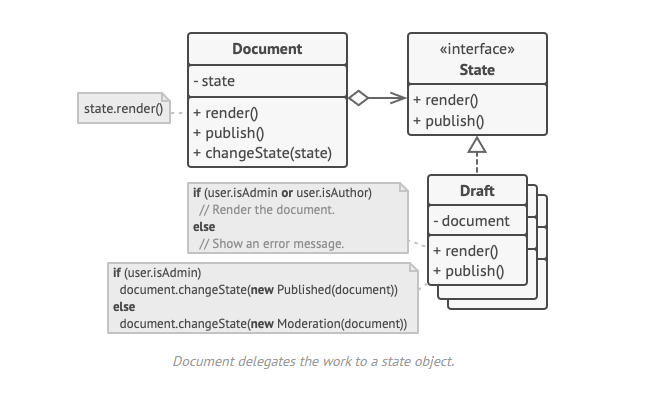
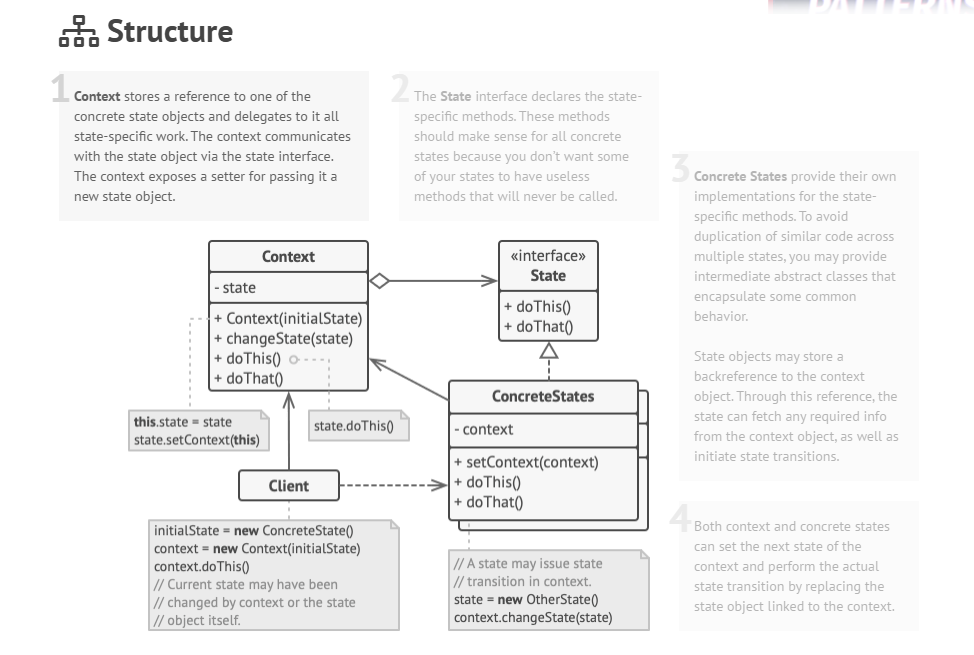

In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod


class Context:
    """
    The Context defines the interface of interest to clients. It also maintains
    a reference to an instance of a State subclass, which represents the current
    state of the Context.
    """

    _state = None
    """
    A reference to the current state of the Context.
    """

    def __init__(self, state: State) -> None:
        self.transition_to(state)

    def transition_to(self, state: State):
        """
        The Context allows changing the State object at runtime.
        """

        print(f"Context: Transition to {type(state).__name__}")
        self._state = state
        self._state.context = self

    """
    The Context delegates part of its behavior to the current State object.
    """

    def request1(self):
        self._state.handle1()

    def request2(self):
        self._state.handle2()


class State(ABC):
    """
    The base State class declares methods that all Concrete State should
    implement and also provides a backreference to the Context object,
    associated with the State. This backreference can be used by States to
    transition the Context to another State.
    """

    @property
    def context(self) -> Context:
        return self._context

    @context.setter
    def context(self, context: Context) -> None:
        self._context = context

    @abstractmethod
    def handle1(self) -> None:
        pass

    @abstractmethod
    def handle2(self) -> None:
        pass


"""
Concrete States implement various behaviors, associated with a state of the
Context.
"""


class ConcreteStateA(State):
    def handle1(self) -> None:
        print("ConcreteStateA handles request1.")
        print("ConcreteStateA wants to change the state of the context.")
        self.context.transition_to(ConcreteStateB())

    def handle2(self) -> None:
        print("ConcreteStateA handles request2.")


class ConcreteStateB(State):
    def handle1(self) -> None:
        print("ConcreteStateB handles request1.")

    def handle2(self) -> None:
        print("ConcreteStateB handles request2.")
        print("ConcreteStateB wants to change the state of the context.")
        self.context.transition_to(ConcreteStateA())


if __name__ == "__main__":
    # The client code.

    context = Context(ConcreteStateA())
    context.request1()
    context.request2()

Context: Transition to ConcreteStateA
ConcreteStateA handles request1.
ConcreteStateA wants to change the state of the context.
Context: Transition to ConcreteStateB
ConcreteStateB handles request2.
ConcreteStateB wants to change the state of the context.
Context: Transition to ConcreteStateA
